In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns
from MCForecastTools import MCSimulation
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go

%matplotlib inline

In [3]:
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()


# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [4]:
# Tickers
ticker = ["DIS", "SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-30", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker.head(10)

DIS                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2017-06-09 00:00:00-04:00  104.29  105.92  104.080  105.62  7628117  244.09   
2017-06-12 00:00:00-04:00  105.89  107.08  103.690  107.05  6753315  243.14   
2017-06-13 00:00:00-04:00  107.14  107.26  104.000  104.15  3788305  243.99   
2017-06-14 00:00:00-04:00  104.53  104.59  103.370  103.74  3483352  244.86   
2017-06-15 00:00:00-04:00  103.47  106.07  102.880  105.95  3685768  242.68   
2017-06-16 00:00:00-04:00  106.28  106.35  104.765  105.53  5951970  242.77   
2017-06-19 00:00:00-04:00  105.55  106.00  105.185  105.32  4599893  243.59   
2017-06-20 00:00:00-04:00  105.07  105.30  103.810  103.94  6062295  244.25   
2017-06-21 00:00:00-04:00  101.81  105.08  101.170  104.83  6241070  243.43   
2017-06-22 00:00:00-04:00  104.71  104.77  104.090  104.22  4144135  242.97   

                                                                
                             high       low   close     volume  
time                                                            
2017-06-09 00:00:00-04:00  245.01  241.9500  243.45  103578275  
2017-06-12 00:00:00-04:00  243.42  242.3800  243.34   57096569  
2017-06-13 00:00:00-04:00  244.61  243.5799  244.52   43470532  
2017-06-14 00:00:00-04:00  244.87  243.2900  244.26   55098826  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79   51523068  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63   48998243  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64   42503652  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04   39203167  
2017-06-21 00:00:00-04:00  243.59  242.4100  242.95   42746920  
2017-06-22 00:00:00-04:00  243.53  242.6400  242.83   32991335

In [4]:
# Tickers
ticker = ["SPY", "TSLA", "GDX", "BLCN"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker.head(10)

BLCN                          GDX                   \
                          open high low close volume   open     high     low   
time                                                                           
2017-06-05 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.83  22.8900  22.490   
2017-06-06 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.08  23.8600  23.080   
2017-06-07 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.57  23.8200  23.320   
2017-06-08 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.40  23.4100  22.960   
2017-06-09 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.84  23.1115  22.810   
2017-06-12 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.75  22.9711  22.680   
2017-06-13 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.61  23.1400  22.600   
2017-06-14 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.38  23.4200  22.095   
2017-06-15 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.00  22.3400  21.960   
2017-06-16 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.06  22.1700  21.940   

                                               SPY                             \
                           close    volume    open    high       low    close   
time                                                                            
2017-06-05 00:00:00-04:00  22.75  20900535  243.98  244.30  243.7600  243.965   
2017-06-06 00:00:00-04:00  23.81  70629310  243.31  243.98  243.1200  243.250   
2017-06-07 00:00:00-04:00  23.63  46367450  243.60  243.92  242.8300  243.650   
2017-06-08 00:00:00-04:00  23.22  49007888  243.77  244.33  243.1700  243.760   
2017-06-09 00:00:00-04:00  22.84  34238600  244.09  245.01  241.9500  243.450   
2017-06-12 00:00:00-04:00  22.75  34267374  243.14  243.42  242.3800  243.340   
2017-06-13 00:00:00-04:00  22.97  32647842  243.99  244.61  243.5799  244.520   
2017-06-14 00:00:00-04:00  22.25  71051409  244.86  244.87  243.2900  244.260   
2017-06-15 00:00:00-04:00  22.11  47857414  242.68  243.91  242.3600  243.790   
2017-06-16 00:00:00-04:00  22.05  42827345  242.77  242.83  241.6337  242.630   

                                         TSLA                              \
                              volume     open      high     low     close   
time                                                                        
2017-06-05 00:00:00-04:00   27596403  338.500  348.4400  334.21  347.3200   
2017-06-06 00:00:00-04:00   36562468  344.950  359.4929  344.66  352.8000   
2017-06-07 00:00:00-04:00   38602639  356.300  360.5000  355.14  359.5500   
2017-06-08 00:00:00-04:00   48051333  363.750  371.9000  360.22  370.0100   
2017-06-09 00:00:00-04:00  103578275  374.420  376.8700  354.80  357.4500   
2017-06-12 00:00:00-04:00   57096569  357.990  364.5000  350.62  358.9900   
2017-06-13 00:00:00-04:00   43470532  367.670  376.0000  366.61  375.9500   
2017-06-14 00:00:00-04:00   55098826  381.085  384.2500  376.31  380.6599   
2017-06-15 00:00:00-04:00   51523068  372.500  375.4600  366.49  375.3400   
2017-06-16 00:00:00-04:00   48998243  377.780  378.0100  370.10  371.4000   

                                     
                             volume  
time                                 
2017-06-05 00:00:00-04:00   5684288  
2017-06-06 00:00:00-04:00   9465968  
2017-06-07 00:00:00-04:00   7850542  
2017-06-08 00:00:00-04:00   7489685  
2017-06-09 00:00:00-04:00  14323526  
2017-06-12 00:00:00-04:00   8528936  
2017-06-13 00:00:00-04:00   9720070  
2017-06-14 00:00:00-04:00  10303555  
2017-06-15 00:00:00-04:00   8585072  
2017-06-16 00:00:00-04:00   4691654

In [5]:
df_ticker.isnull().sum()

DIS  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [6]:
df = df_ticker.dropna()

df.isnull().sum()

DIS  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [7]:
df.tail()

DIS                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-05-24 00:00:00-04:00  172.54  175.11  171.75  174.32  6405443  417.34   
2021-05-25 00:00:00-04:00  175.60  177.45  175.40  176.20  6335207  420.33   
2021-05-26 00:00:00-04:00  176.71  177.90  176.20  176.48  5652807  418.87   
2021-05-27 00:00:00-04:00  177.24  179.59  176.79  179.14  6408228  420.17   
2021-05-28 00:00:00-04:00  179.56  180.14  178.08  178.72  5850632  420.97   

                                                               
                             high       low   close    volume  
time                                                           
2021-05-24 00:00:00-04:00  420.32  417.0800  419.12  45499764  
2021-05-25 00:00:00-04:00  420.71  417.6200  418.25  50977513  
2021-05-26 00:00:00-04:00  419.61  417.7600  419.04  38369865  
2021-05-27 00:00:00-04:00  420.72  418.9851  419.69  48411613  
2021-05-28 00:00:00-04:00  421.25  419.7900  420.02  49200328

In [8]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices 
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
df_closing_prices["DIS"] = df_ticker["DIS"]["close"]
#df_closing_prices["BLCN"] = df_ticker["BLCN"]["close"]
#df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.tail()

SPY       DIS
2021-05-24  0.010049  0.010785
2021-05-25 -0.002076  0.010785
2021-05-26  0.001889  0.001589
2021-05-27  0.001551  0.015073
2021-05-28  0.000786 -0.002345

In [9]:
df_daily_returns.describe()

SPY         DIS
count  999.000000  999.000000
mean     0.000633    0.000719
std      0.013136    0.019716
min     -0.116340   -0.129846
25%     -0.003428   -0.007758
50%      0.000967    0.000309
75%      0.006320    0.008591
max      0.094737    0.142840

In [10]:
df_closing_prices.describe()

SPY          DIS
count  1000.000000  1000.000000
mean    299.776326   125.462336
std      44.304724    25.388088
min     222.510000    85.760000
25%     269.642500   106.038750
50%     287.735000   116.000000
75%     322.785000   137.945000
max     422.090000   201.920000

<AxesSubplot:ylabel='Frequency'>

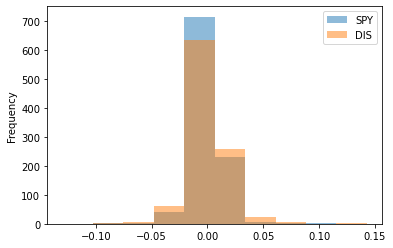

In [11]:
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

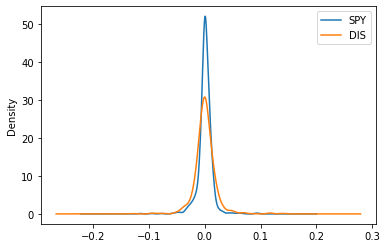

In [12]:
df_daily_returns.plot.density()

<AxesSubplot:>

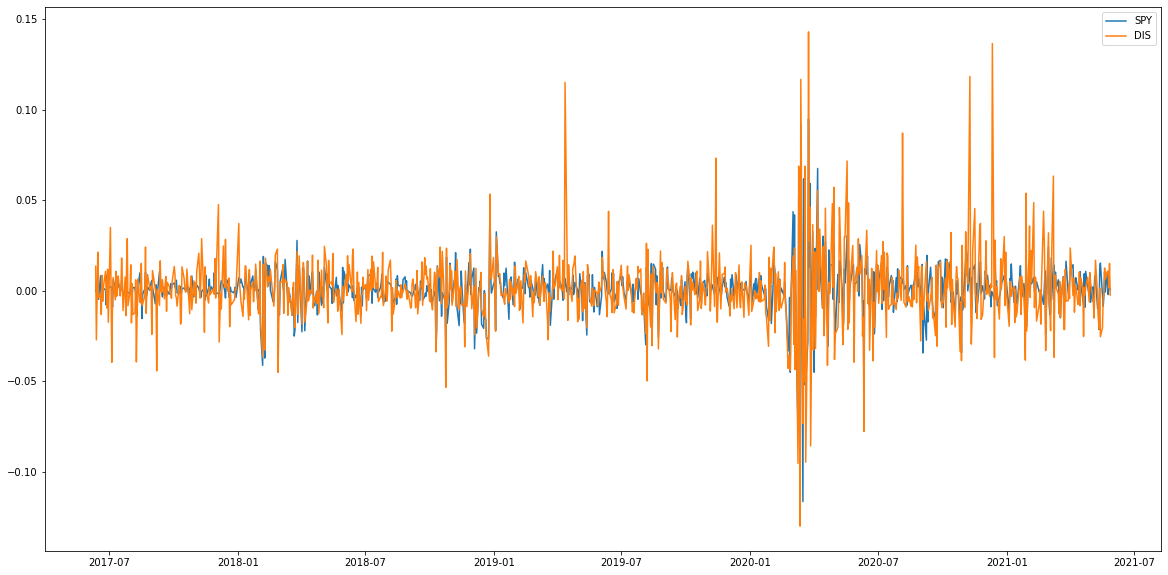

In [13]:
df_daily_returns.plot(figsize = (20,10))

<AxesSubplot:title={'center':'2 different assets'}>

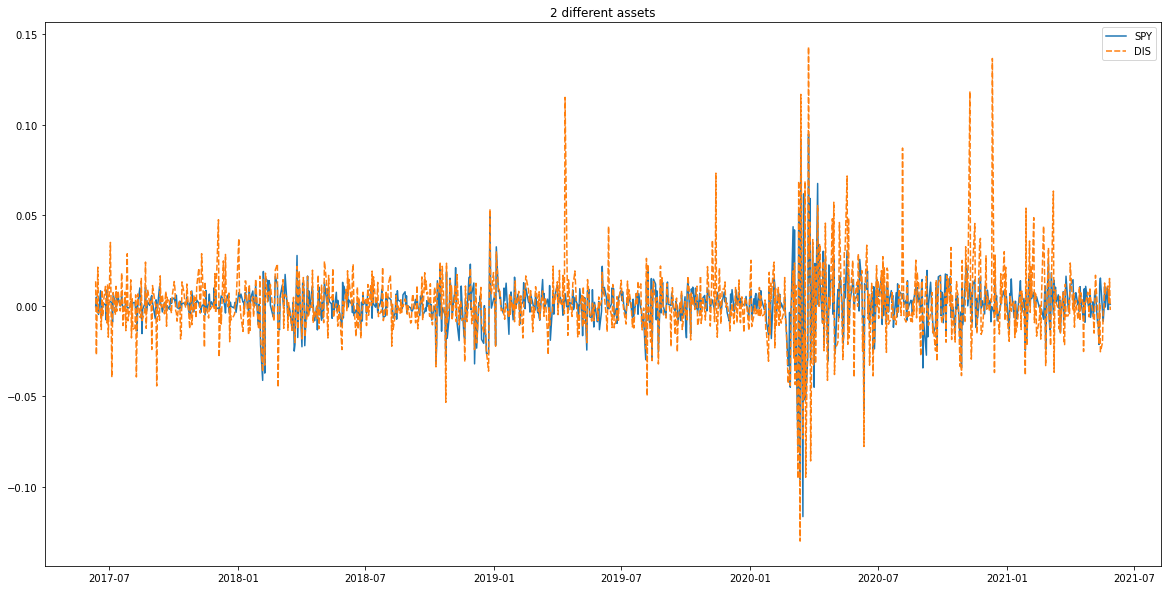

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("2 different assets")

# Line chart showing daily global streams of each song 
sns.lineplot(data=df_daily_returns)

Text(0, 0.5, 'Vertical Label')

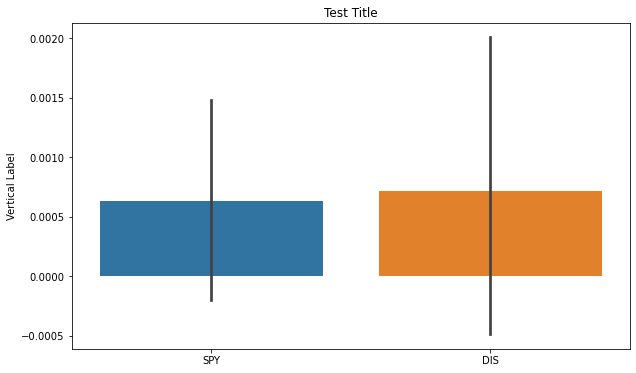

In [15]:
 #Set the width and height of the figure
plt.figure(figsize=(10,6))
 
# Add title
plt.title("Test Title")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(data= df_daily_returns)

# Add label for vertical axis
plt.ylabel("Vertical Label")

Text(0.5, 0, 'Date')

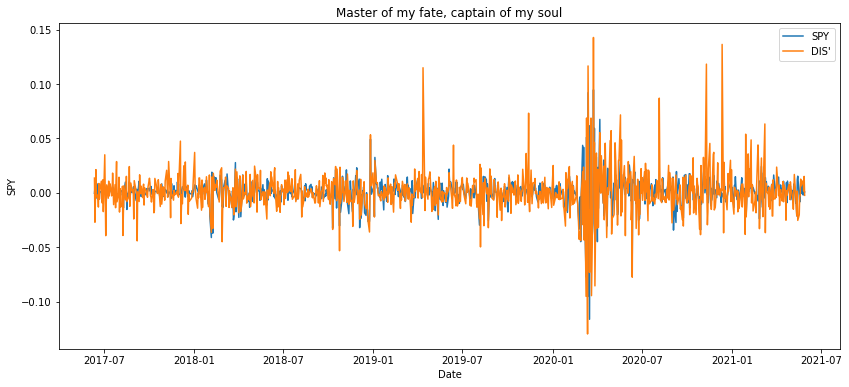

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Master of my fate, captain of my soul")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=df_daily_returns['SPY'], label="SPY")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=df_daily_returns['DIS'], label="DIS'")

# Add label for horizontal axis
plt.xlabel("Date")

<AxesSubplot:>

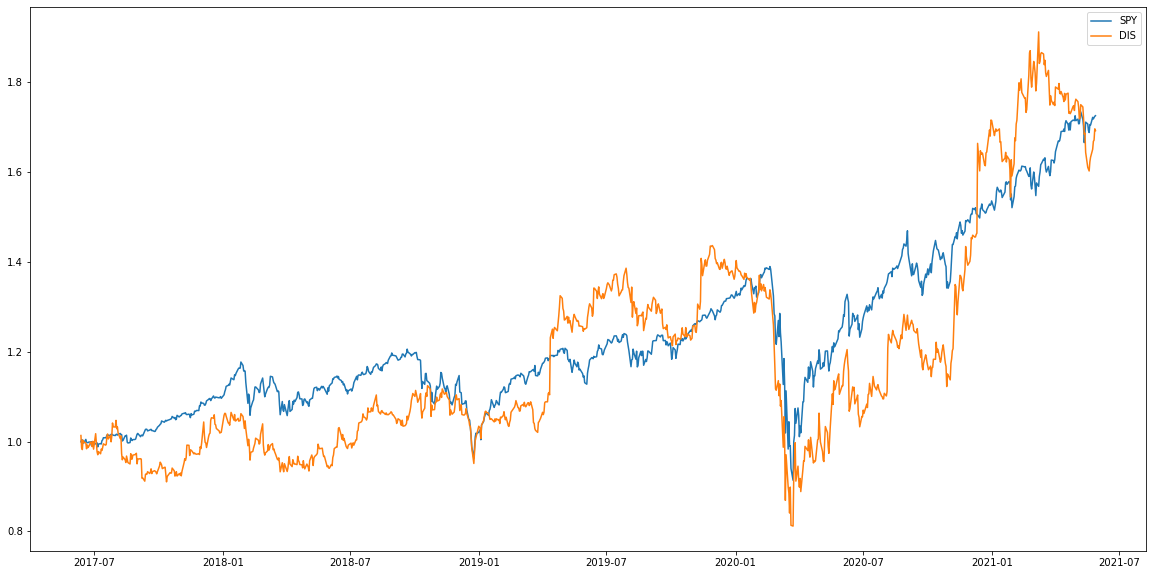

In [17]:
df_daily_returns = (1+ df_daily_returns).cumprod()
df_daily_returns.plot(figsize = (20,10))


<AxesSubplot:>

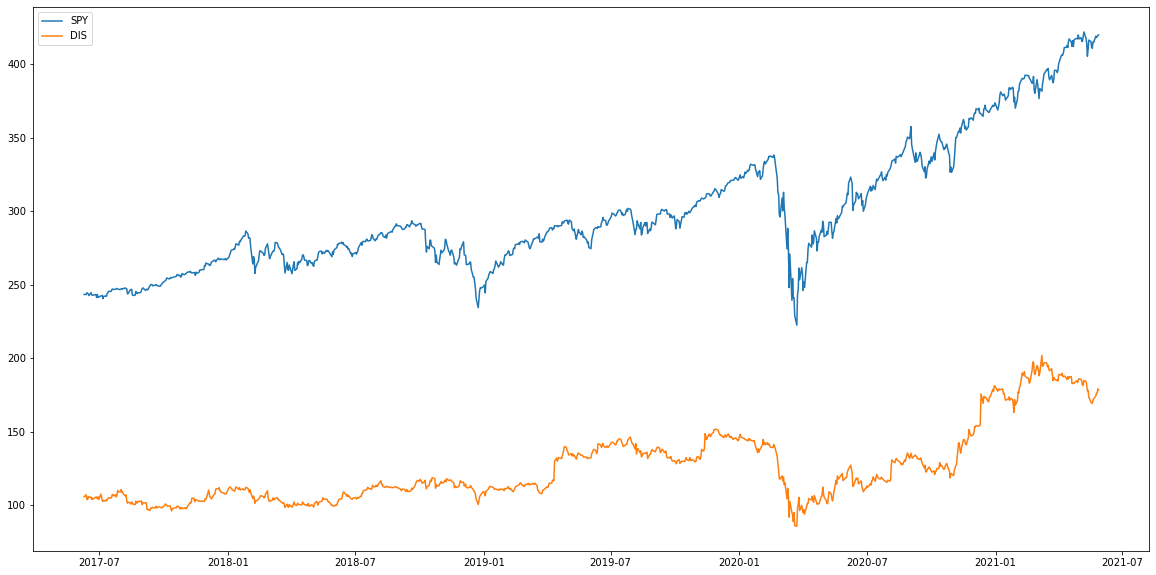

In [18]:
df_closing_prices.plot(figsize = (20,10))

In [20]:
sharpe_ratios = ((df_daily_returns.mean()-df_daily_returns['SPY'].mean()) * 252) / (df_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SPY    0.000000
DIS   -2.875236
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

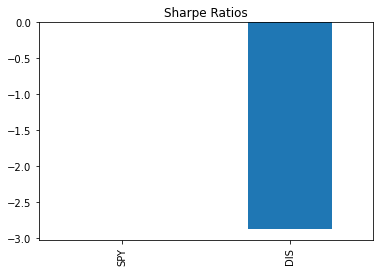

In [21]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [22]:
rolling_dis_covariance = df_daily_returns['DIS'].rolling(window=60).cov(df_daily_returns['SPY'])
rolling_variance = df_daily_returns['SPY'].rolling(window=60).var()
rolling_dis_beta = rolling_dis_covariance / rolling_variance
rolling_dis_beta

2017-06-12         NaN
2017-06-13         NaN
2017-06-14         NaN
2017-06-15         NaN
2017-06-16         NaN
                ...   
2021-05-24   -0.823452
2021-05-25   -0.825127
2021-05-26   -0.831279
2021-05-27   -0.847487
2021-05-28   -0.922922
Length: 999, dtype: float64

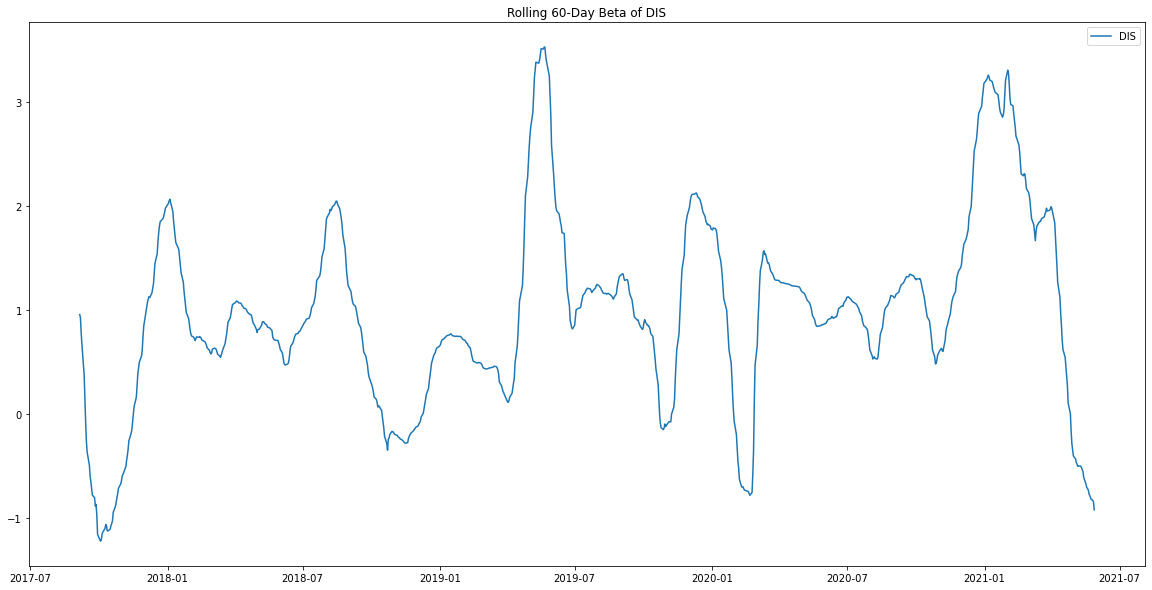

In [23]:
ax = rolling_dis_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of DIS')
ax.legend(["DIS"])

In [24]:
# Tickers
ticker2 = ["DIS"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker2 = alpaca.get_barset(
    ticker2,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker2.head(10)

DIS                                   
                             open     high      low   close   volume
time                                                                
2017-06-05 00:00:00-04:00  104.63  106.875  103.720  106.51  5302320
2017-06-06 00:00:00-04:00  106.17  106.190  104.610  105.51  8287158
2017-06-07 00:00:00-04:00  105.79  106.250  103.430  103.52  4621500
2017-06-08 00:00:00-04:00  103.19  104.490  101.800  104.32  8839933
2017-06-09 00:00:00-04:00  104.29  105.920  104.080  105.62  7628117
2017-06-12 00:00:00-04:00  105.89  107.080  103.690  107.05  6753315
2017-06-13 00:00:00-04:00  107.14  107.260  104.000  104.15  3788305
2017-06-14 00:00:00-04:00  104.53  104.590  103.370  103.74  3483352
2017-06-15 00:00:00-04:00  103.47  106.070  102.880  105.95  3685768
2017-06-16 00:00:00-04:00  106.28  106.350  104.765  105.53  5951970

In [25]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker2,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [26]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.987854  1.019098  0.995740  1.023863  0.975317  1.021576  1.003715   
2     1.006357  1.011185  0.961060  1.030087  0.974887  1.013458  1.028801   
3     1.024659  1.005594  0.980265  1.018938  0.957372  0.994487  1.010854   
4     1.040378  1.009692  0.991374  1.061529  0.934988  1.030556  1.006116   
...        ...       ...       ...       ...       ...       ...       ...   
1256  8.502921  0.489598  1.374744  7.265623  0.961385  1.306756  1.189564   
1257  8.476676  0.470774  1.361628  7.409325  0.932056  1.276391  1.194392   
1258  8.543926  0.464064  1.332211  7.487076  0.941650  1.298747  1.166184   
1259  8.754165  0.469808  1.330131  7.610266  0.939641  1.278467  1.181865   
1260  8.597096  0.478449  1.343688  7.500127  0.946619  1.273765  1.212756   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.978454  1.023283  0.993873  ...  1.003560  1.002851  1.014475   
2     0.967766  1.004312  0.997981  ...  1.003474  0.957595  1.020633   
3     0.988946  1.004087  1.039838  ...  0.994449  0.967048  0.991952   
4     1.013734  0.988441  1.039818  ...  0.961978  0.949806  1.004035   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.769284  1.140920  4.470438  ...  1.054246  0.700017  5.642783   
1257  2.768944  1.127033  4.474679  ...  1.032506  0.721671  5.442071   
1258  2.714371  1.131365  4.549382  ...  1.016179  0.719143  5.544363   
1259  2.770186  1.106126  4.588492  ...  1.008376  0.708519  5.684674   
1260  2.724008  1.079961  4.681072  ...  0.996531  0.718665  5.628011   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.993656  0.986742  0.990200  1.013199  0.986408  1.001764  0.982968  
2     1.029264  1.020580  0.993297  1.045756  0.998031  1.059026  0.995944  
3     1.026259  1.027858  0.976823  1.067404  0.979931  1.050564  1.032786  
4     1.005032  1.045369  0.995707  1.075967  1.008842  1.063046  1.052515  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.673898  4.137278  4.576997  1.006633  2.156177  0.255821  3.842559  
1257  0.684018  4.224504  4.688463  1.016318  2.170286  0.259099  3.742673  
1258  0.695565  4.168592  4.648454  1.014996  2.207299  0.256365  3.842053  
1259  0.686911  4.123153  4.695014  1.022533  2.231650  0.256266  3.849535  
1260  0.714060  4.093796  4.705820  0.986484  2.163900  0.257456  3.897494  

[1261 rows x 1000 columns]

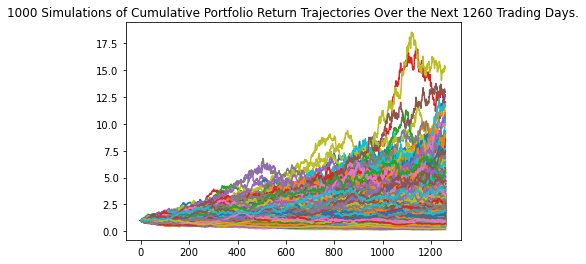

In [28]:
line_plot = MC_fiveyear.plot_simulation()

In [29]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.000144  0.999979  0.942515  1.059603
2  1.000568  0.999403  0.926933  1.091616
3  1.002567  1.001246  0.904875  1.111742
4  1.003381  1.002054  0.893178  1.121884

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of DIS Stock Over the Next Year'}>

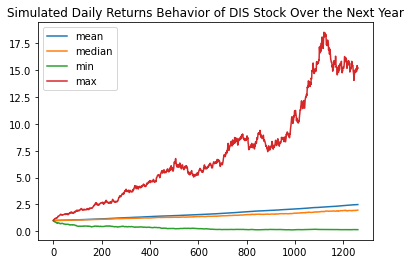

In [30]:
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of DIS Stock Over the Next Year")

In [31]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean        median           min           max
0  10000.000000  10000.000000  10000.000000  10000.000000
1  10001.444518   9999.790102   9425.149665  10596.032474
2  10005.681595   9994.031702   9269.332995  10916.155457
3  10025.666419  10012.463556   9048.745951  11117.422011
4  10033.811657  10020.541374   8931.779229  11218.841641

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of DIS Stock Over the Next Year'}>

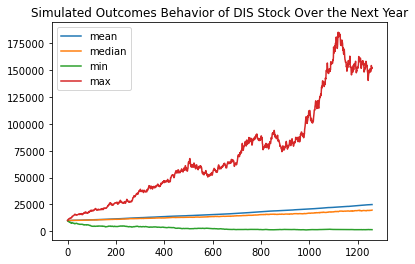

In [32]:
cumulative_pnl.plot(title="Simulated Outcomes Behavior of DIS Stock Over the Next Year")

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               2.487791
std                1.886779
min                0.149773
25%                1.224283
50%                1.972980
75%                3.134594
max               15.208140
95% CI Lower       0.535531
95% CI Upper       7.593510
Name: 1260, dtype: float64


In [34]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $5355.31 and $75935.1.


In [35]:
# Tickers
ticker3 = ["SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker3 = alpaca.get_barset(
    ticker3,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker3.head(10)

SPY                                      
                             open    high       low    close     volume
time                                                                   
2017-06-05 00:00:00-04:00  243.98  244.30  243.7600  243.965   27596403
2017-06-06 00:00:00-04:00  243.31  243.98  243.1200  243.250   36562468
2017-06-07 00:00:00-04:00  243.60  243.92  242.8300  243.650   38602639
2017-06-08 00:00:00-04:00  243.77  244.33  243.1700  243.760   48051333
2017-06-09 00:00:00-04:00  244.09  245.01  241.9500  243.450  103578275
2017-06-12 00:00:00-04:00  243.14  243.42  242.3800  243.340   57096569
2017-06-13 00:00:00-04:00  243.99  244.61  243.5799  244.520   43470532
2017-06-14 00:00:00-04:00  244.86  244.87  243.2900  244.260   55098826
2017-06-15 00:00:00-04:00  242.68  243.91  242.3600  243.790   51523068
2017-06-16 00:00:00-04:00  242.77  242.83  241.6337  242.630   48998243

In [36]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_fiveyear2 = MCSimulation(
    portfolio_data = df_ticker3,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [37]:
MC_fiveyear2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.017900  1.030781  1.015709  0.993417  0.999234  0.979392  1.000232   
2     1.032013  1.049698  1.007169  1.006012  0.984694  0.995370  1.010867   
3     1.012286  1.059704  0.997293  1.000680  0.987422  1.040518  1.021905   
4     1.002688  1.089861  0.998947  0.979556  1.004939  1.039016  1.014020   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.335261  1.734605  1.636033  3.256113  3.628207  2.469881  1.461979   
1257  1.341104  1.723004  1.628379  3.261077  3.560888  2.407030  1.413648   
1258  1.335942  1.744561  1.645822  3.239534  3.540343  2.472274  1.419724   
1259  1.345472  1.747901  1.588279  3.249357  3.553797  2.468527  1.422815   
1260  1.360560  1.793641  1.605480  3.297688  3.565143  2.503783  1.432734   

           7         8         9    ...       990       991       992  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.995178  1.006307  1.007962  ...  1.007474  1.003803  1.004490   
2     0.983212  1.023325  1.031930  ...  0.995884  0.982387  1.000130   
3     0.971892  1.019353  1.043041  ...  1.020633  0.983214  1.006964   
4     0.952696  1.017578  1.040143  ...  1.032595  0.968508  0.995977   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.753033  2.187254  2.842644  ...  2.004729  2.065905  1.949142   
1257  2.799215  2.143355  2.855116  ...  1.996310  2.044922  1.937044   
1258  2.801230  2.179155  2.842241  ...  1.989020  2.044300  1.946400   
1259  2.714243  2.158539  2.817222  ...  1.978473  2.037218  1.970784   
1260  2.777578  2.188156  2.768542  ...  1.982160  2.065561  2.016894   

           993       994       995       996       997       998       999  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.990792  0.982211  1.000423  0.991997  0.990562  0.993375  0.974967  
2     0.997018  0.981790  1.021350  0.947849  0.987777  0.973869  0.982689  
3     0.987622  0.999553  1.012758  0.936975  0.987734  0.960478  0.971385  
4     0.988114  0.984014  1.029244  0.924054  0.982233  0.958890  0.966466  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.353155  2.554762  0.887289  1.449533  2.043771  2.154894  4.043978  
1257  1.367522  2.551029  0.913008  1.410362  2.025226  2.159674  4.034851  
1258  1.358454  2.592015  0.936122  1.381403  2.026248  2.148270  3.917107  
1259  1.352768  2.613841  0.936352  1.380996  2.057803  2.146741  3.937842  
1260  1.385887  2.592863  0.953327  1.379937  2.023557  2.128144  3.941907  

[1261 rows x 1000 columns]

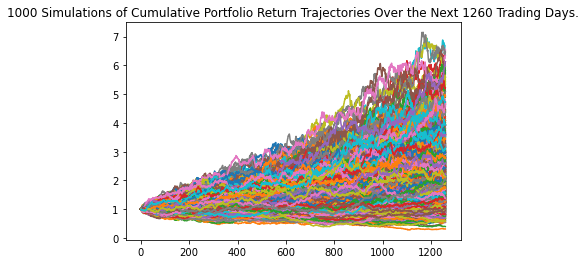

In [39]:
line_plot2 = MC_fiveyear2.plot_simulation()

In [40]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data2 = {
    "mean": list(MC_fiveyear2.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear2.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear2.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear2.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns2 = pd.DataFrame(simulated_returns_data2)

# Display sample data
df_simulated_returns2.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.000732  1.000754  0.960375  1.046635
2  1.001385  1.000784  0.947835  1.062507
3  1.001666  1.001399  0.924196  1.098000
4  1.001854  1.002620  0.919330  1.098273

<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of SPY Stock Over the Next Year'}>

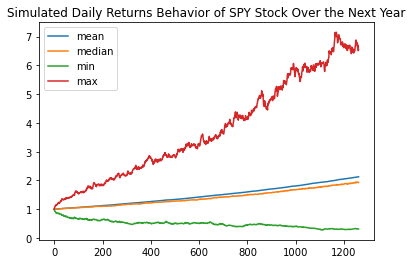

In [41]:
df_simulated_returns2.plot(title="Simulated Daily Returns Behavior of SPY Stock Over the Next Year")

In [42]:
# Set initial investment
initial_investment2 = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl2 = initial_investment2 * df_simulated_returns2

# Display sample data
cumulative_pnl2.head()

mean        median           min           max
0  10000.000000  10000.000000  10000.000000  10000.000000
1  10007.319502  10007.537283   9603.748715  10466.346123
2  10013.851389  10007.838530   9478.352636  10625.073393
3  10016.656539  10013.992300   9241.960632  10980.000247
4  10018.540748  10026.196230   9193.296573  10982.730446

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of SPY Stock Over the Next Year'}>

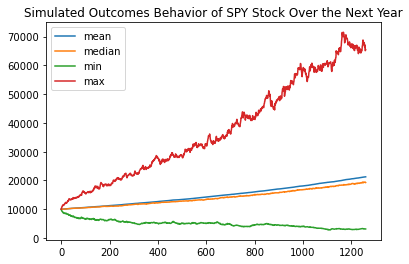

In [43]:
cumulative_pnl2.plot(title="Simulated Outcomes Behavior of SPY Stock Over the Next Year")

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_fiveyear2.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           1000.000000
mean               2.125996
std                1.009607
min                0.314408
25%                1.415471
50%                1.927719
75%                2.593972
max                6.547258
95% CI Lower       0.779469
95% CI Upper       4.731167
Name: 1260, dtype: float64


In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower2 = round(tbl2[8]*10000,2)
ci_upper2 = round(tbl2[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $7794.69 and $47311.67.


<AxesSubplot:>

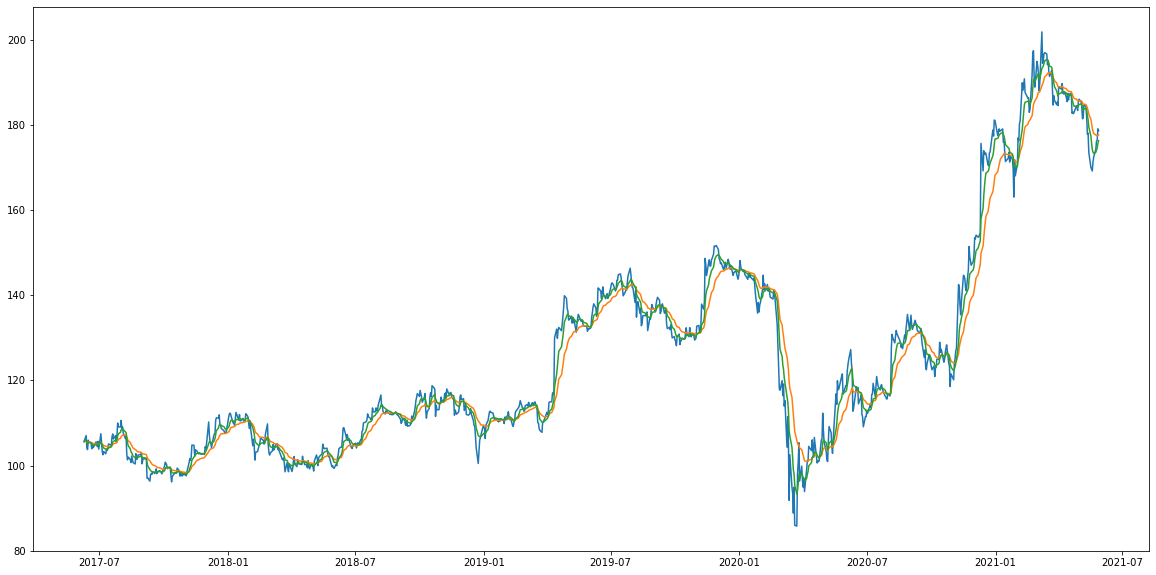

In [46]:
dis_21_ema = df_closing_prices['DIS'].ewm(span=21, adjust=False).mean()
dis_8_ema = df_closing_prices['DIS'].ewm(span=8, adjust=False).mean()
df_closing_prices['DIS'].plot(figsize = (20,10))
dis_21_ema.plot(figsize = (20,10))
dis_8_ema.plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

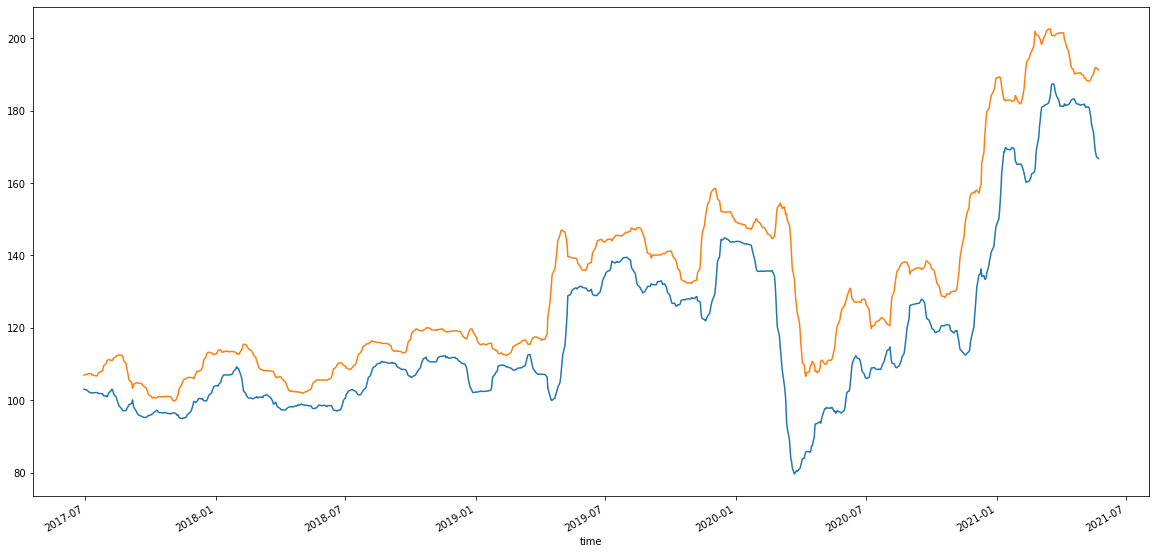

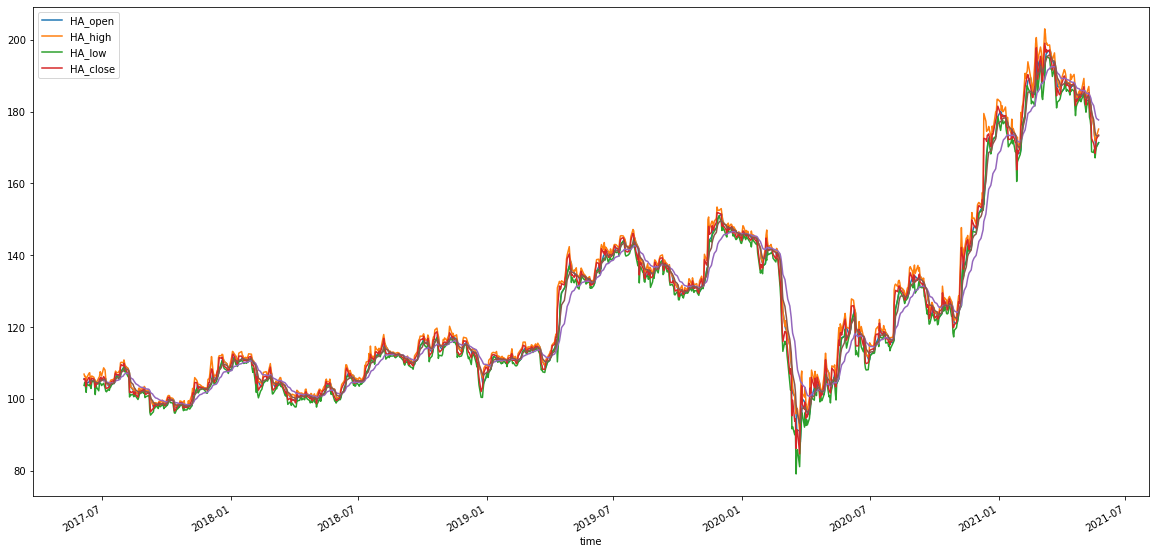

In [64]:
ema21_ohlc4 = ta.ema(ta.ohlc4(df_ticker2['DIS']["open"], df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(df_ticker2['DIS']["open"], df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles = ta.ha(df_ticker2['DIS']["open"], df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"], offset=None)
bbands = ta.bbands(df_ticker2['DIS']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1.5, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"], length=14, mamode="ema", drift=1, offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles.plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))



<AxesSubplot:xlabel='time'>

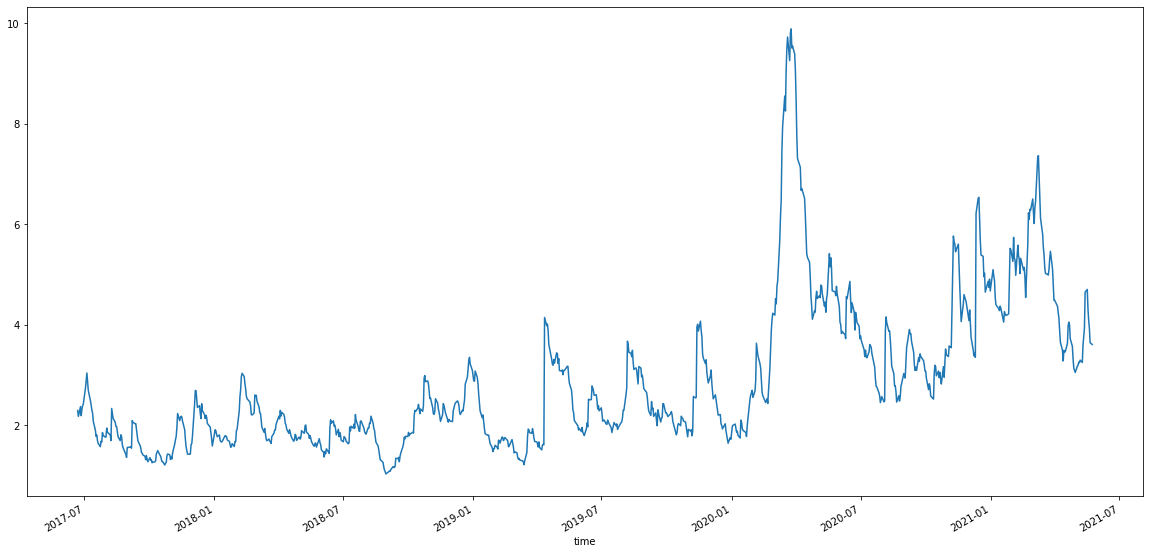

In [65]:
tr.plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

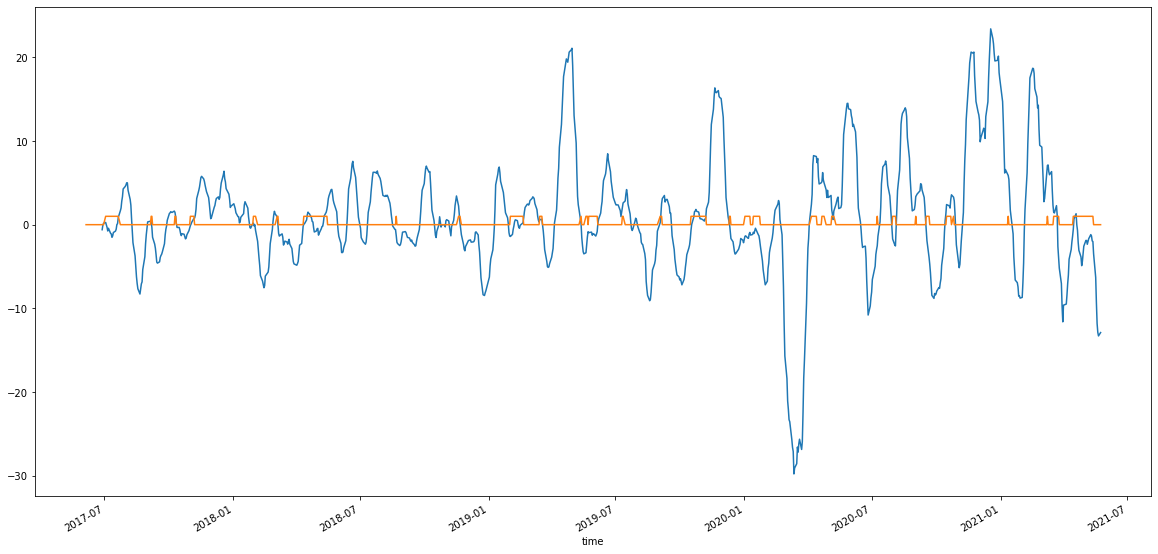

In [55]:
squeeze['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))
squeeze['SQZ_ON'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

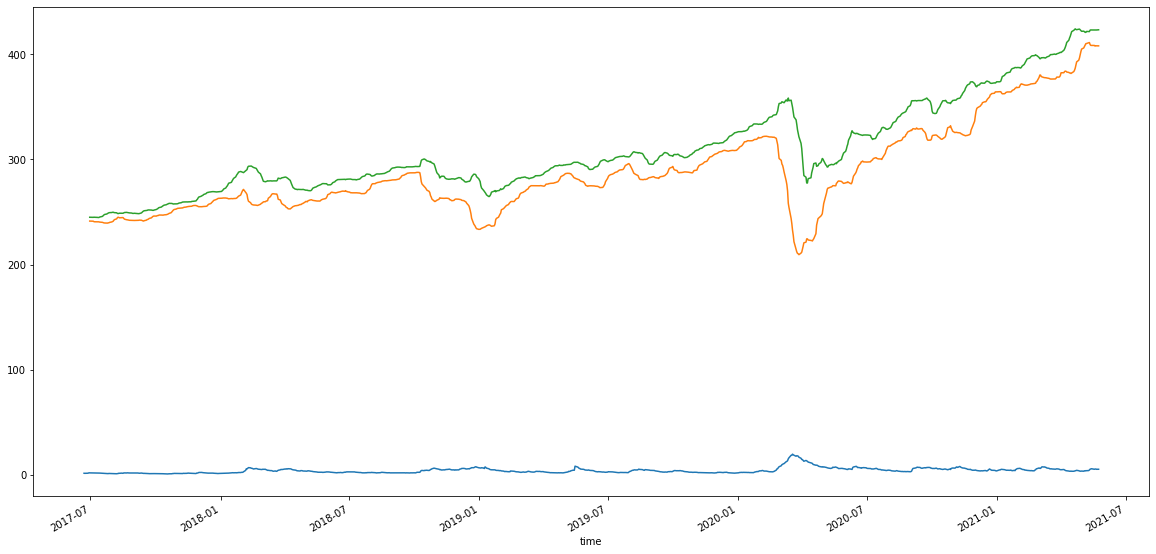

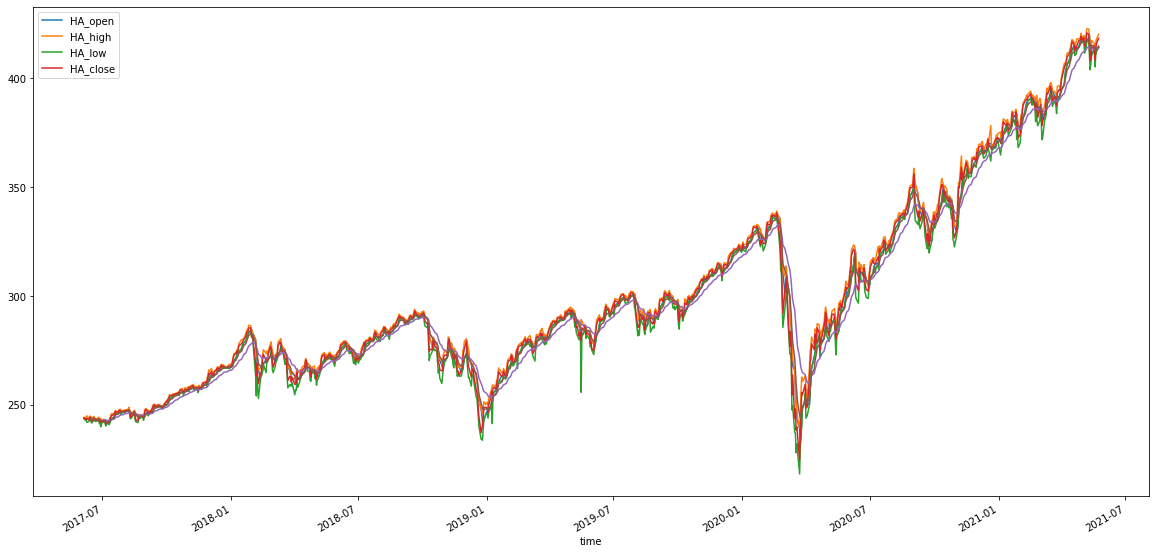

In [62]:
ema21_ohlc4_2 = ta.ema(ta.ohlc4(df_ticker3['SPY']["open"], df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"]), length=21)
ema08_ohlc4_2 = ta.ema(ta.ohlc4(df_ticker3['SPY']["open"], df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles2 = ta.ha(df_ticker3['SPY']["open"], df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"], offset=None)
bbands2 = ta.bbands(df_ticker3['SPY']["close"], length=20, std=None, mamode=None, offset=None)
squeeze2 = ta.squeeze(df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1.5, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr2 = ta.atr(df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"], length=14, mamode="ema", drift=1, offset=0)

fig = plt.figure()
bbands2['BBL_20_2.0'].plot(figsize = (20,10))
bbands2['BBU_20_2.0'].plot(figsize = (20,10))
candles2.plot(figsize = (20,10))
ema21_ohlc4_2.plot(figsize = (20,10))
ema08_ohlc4_2.plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

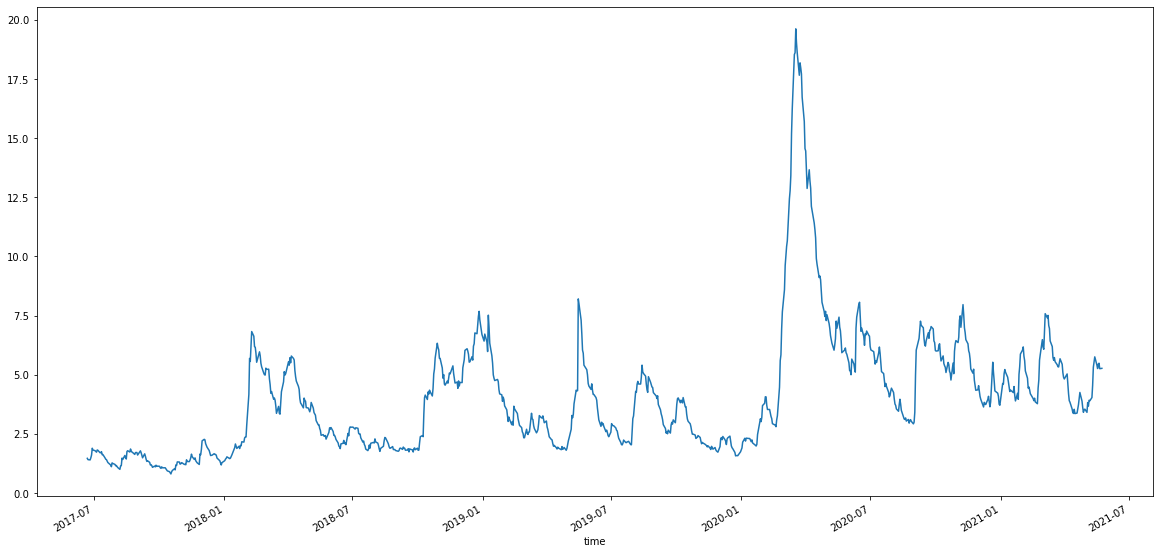

In [63]:
tr2.plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

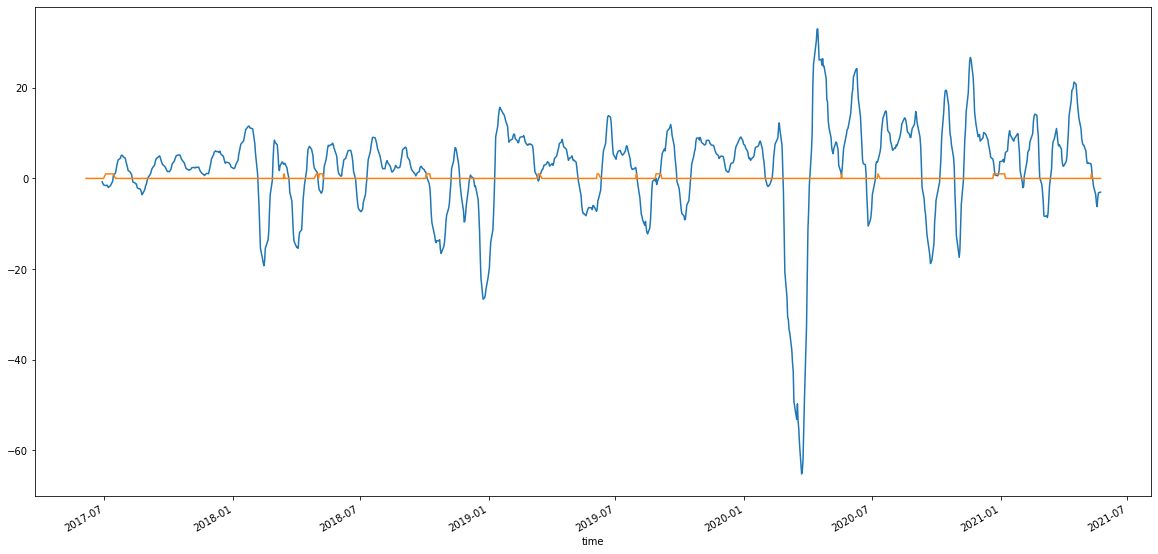

In [60]:
squeeze2['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))
squeeze2['SQZ_ON'].plot(figsize = (20,10))

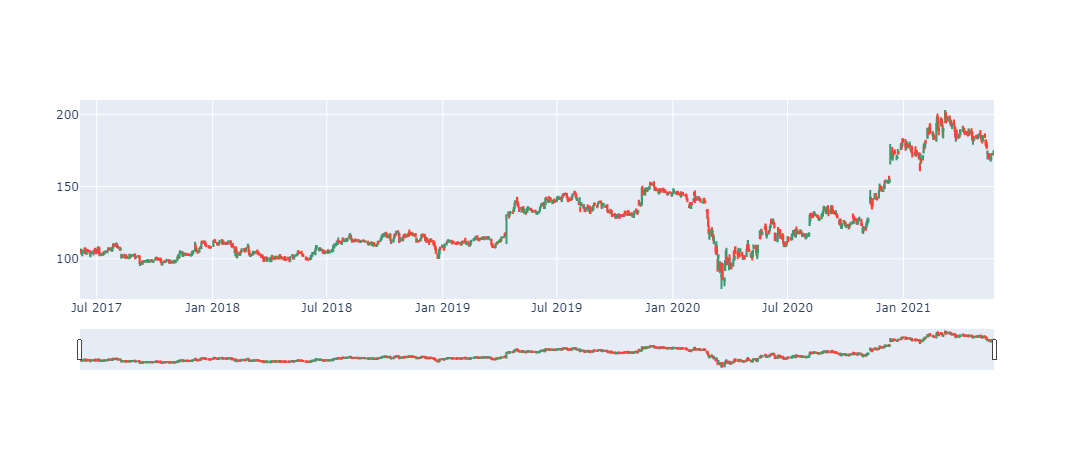

In [52]:
fig = go.Figure(data=[go.Candlestick(x=df_ticker2['DIS'].index,
                open=df_ticker2['DIS']['open'],
                high=df_ticker2['DIS']['high'],
                low=df_ticker2['DIS']['low'],
                close=df_ticker2['DIS']['close'])])

fig.show()

In [51]:
df_ticker2['DIS'].index

DatetimeIndex(['2017-06-05 00:00:00-04:00', '2017-06-06 00:00:00-04:00',
               '2017-06-07 00:00:00-04:00', '2017-06-08 00:00:00-04:00',
               '2017-06-09 00:00:00-04:00', '2017-06-12 00:00:00-04:00',
               '2017-06-13 00:00:00-04:00', '2017-06-14 00:00:00-04:00',
               '2017-06-15 00:00:00-04:00', '2017-06-16 00:00:00-04:00',
               ...
               '2021-05-11 00:00:00-04:00', '2021-05-12 00:00:00-04:00',
               '2021-05-13 00:00:00-04:00', '2021-05-14 00:00:00-04:00',
               '2021-05-17 00:00:00-04:00', '2021-05-18 00:00:00-04:00',
               '2021-05-19 00:00:00-04:00', '2021-05-20 00:00:00-04:00',
               '2021-05-21 00:00:00-04:00', '2021-05-24 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='time', length=1000, freq=None)

In [61]:
help(ta.atr)

Help on function atr in module pandas_ta.volatility.atr:

atr(high, low, close, length=None, mamode=None, drift=None, offset=None, **kwargs)
    Average True Range (ATR)
    
    Averge True Range is used to measure volatility, especially volatility caused by
    gaps or limit moves.
    
    Sources:
        https://www.tradingview.com/wiki/Average_True_Range_(ATR)
    
    Calculation:
        Default Inputs:
            length=14, drift=1, percent=False
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        WMA = Weighted Moving Average
        RMA = WildeR's Moving Average
        TR = True Range
    
        tr = TR(high, low, close, drift)
        if 'ema':
            ATR = EMA(tr, length)
        elif 'sma':
            ATR = SMA(tr, length)
        elif 'wma':
            ATR = WMA(tr, length)
        else:
            ATR = RMA(tr, length)
    
        if percent:
            ATR *= 100 / close
    
    Args:
        high (pd.Series): Series of '